In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense,Input
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# Importing dataset
data = pd.read_csv('/content/lungcapacity.csv')

### Preprocessing data


Making a function that Removes NA values from the dataset

In [ ]:
def RemoveNA(dataframe,columnName):
    dataframe[columnName] = pd.to_numeric(dataframe[columnName], errors='coerce')  # Replace non-numeric with NaN
    data.dropna(subset=[columnName], inplace=True)  # Drop rows with NaN in columnName


In [ ]:
# Found out on manual examination found out that the columns containing 'No of children' and 'Weighs' are not accurate , thus removing them.
data.drop(['No of children','Weight (kg)'],axis = 1,inplace = True)

In [ ]:
data

,LungCap(cc),Age( years),Height(inches),Smoke,Gender,Caesarean
0,6.475,6.0,62.1,NaN,male,no
1,10.125,18.0,74.7,yes,female,no
2,9.550,16.0,69.7,no,female,yes
3,11.125,14.0,71.0,no,male,no
4,4.800,5.0,56.9,no,male,no
...,...,...,...,...,...,...
741,9.925,16.0,68.3,no,female,no
742,8.725,19.0,68.4,no,female,no
743,7.075,11.0,66.7,no,male,yes
744,8.825,16.0,71.3,yes,female,no


In [ ]:
data['Caesarean'].unique()  #['no', 'yes', nan, '999']

array(['no', 'yes', nan, '999'], dtype=object)

In [ ]:
data.drop(220,axis = 0,inplace = True) #To remove '999'

In [ ]:
def Caesarean(x):
    if str(x)=='yes':
        return 1
    elif str(x)=='no':
      return 0
    return x
data['Caesarean'] = data['Caesarean'].apply(Caesarean)

In [ ]:
data['Caesarean'].unique()  #[0, 1, nan]

array([ 0.,  1., nan])

In [ ]:
RemoveNA(data,'Caesarean')

In [ ]:
data['Caesarean'].unique()  #['no', 'yes']

array([0., 1.])

In [ ]:
data[:][data['LungCap(cc)'].isna()]

,LungCap(cc),Age( years),Height(inches),Smoke,Gender,Caesarean
361,NaN,15.0,70.2,no,male,0.0
509,NaN,13.0,77.2,no,female,1.0
564,NaN,12.0,64.5,yes,male,0.0
592,NaN,10.0,61.4,no,female,0.0
616,NaN,15.0,76.6,no,male,1.0
641,NaN,12.0,64.0,no,male,1.0
665,NaN,10.0,64.4,no,male,0.0
692,NaN,13.0,58.4,no,female,0.0
718,NaN,17.0,68.8,no,male,1.0
745,NaN,17.0,68.8,no,male,1.0


In [ ]:
RemoveNA(data,'LungCap(cc)')

In [ ]:
data[:][data['Age( years)'].isna()]

,LungCap(cc),Age( years),Height(inches),Smoke,Gender,Caesarean
41,10.725,NaN,72.5,no,female,1.0
66,5.375,NaN,59.3,yes,female,0.0
155,2.850,NaN,51.4,no,female,0.0
214,7.250,NaN,59.9,no,male,0.0
284,10.325,NaN,69.3,no,male,0.0
304,6.625,NaN,59.8,no,female,0.0
332,10.050,NaN,67.4,no,male,0.0
427,12.275,NaN,75.9,no,male,1.0
501,8.000,NaN,65.9,no,male,1.0
565,7.225,NaN,63.5,no,male,0.0


In [ ]:
RemoveNA(data,'Age( years)')

In [ ]:
data['Age( years)'].value_counts()

Age( years)
12.0     66
15.0     65
13.0     65
11.0     58
14.0     56
16.0     55
10.0     51
18.0     43
17.0     42
9.0      40
8.0      38
19.0     38
7.0      37
6.0      25
5.0      21
3.0      14
4.0       6
999.0     1
Name: count, dtype: int64

In [ ]:
data[:][data['Smoke'].isna()]

,LungCap(cc),Age( years),Height(inches),Smoke,Gender,Caesarean
0,6.475,6.0,62.1,NaN,male,0.0
246,8.000,9.0,66.4,NaN,male,0.0
273,6.975,12.0,58.8,NaN,male,0.0
435,11.300,15.0,73.7,NaN,male,0.0
468,7.000,12.0,66.1,NaN,male,0.0
531,8.500,12.0,65.4,NaN,female,0.0


In [ ]:
# I assume that as all of them have age less than 18, therefore they do not smoke
data['Smoke'] = data['Smoke'].apply(lambda x: 1 if str(x)=='yes' else 0)

In [ ]:
data[:][data['Gender'].isna()]

,LungCap(cc),Age( years),Height(inches),Smoke,Gender,Caesarean
70,8.500,14.0,61.4,0,NaN,1.0
98,10.675,16.0,74.9,0,NaN,0.0


In [ ]:
def Gender(x):
    if str(x)=='female':
        return 1
    elif str(x)=='male':
        return 0
    return x
data['Gender'] = data['Gender'].apply(Gender)

In [ ]:
RemoveNA(data, 'Gender')

In [ ]:
RemoveNA(data,'Height(inches)')

In [ ]:
data

,LungCap(cc),Age( years),Height(inches),Smoke,Gender,Caesarean
0,6.475,6.0,62.1,0,0.0,0.0
1,10.125,18.0,74.7,1,1.0,0.0
2,9.550,16.0,69.7,0,1.0,1.0
3,11.125,14.0,71.0,0,0.0,0.0
4,4.800,5.0,56.9,0,0.0,0.0
...,...,...,...,...,...,...
740,9.325,14.0,65.5,0,0.0,0.0
741,9.925,16.0,68.3,0,1.0,0.0
742,8.725,19.0,68.4,0,1.0,0.0
743,7.075,11.0,66.7,0,0.0,1.0


In [ ]:
data.describe()

,LungCap(cc),Age( years),Height(inches),Smoke,Gender,Caesarean
count,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000
mean,7.850819,12.320675,64.804079,0.106892,0.499297,0.219409
std,2.652989,4.030323,7.174087,0.309193,0.500351,0.414138
min,0.507000,3.000000,45.300000,0.000000,0.000000,0.000000
25%,6.150000,9.000000,59.900000,0.000000,0.000000,0.000000
50%,8.000000,13.000000,65.400000,0.000000,0.000000,0.000000
75%,9.750000,15.000000,70.350000,0.000000,1.000000,0.000000
max,14.675000,19.000000,81.800000,1.000000,1.000000,1.000000


In [ ]:
# When looking at describe found out a outliyer in age, age is 999, which is not possible , removing that row and searching for other outliers.
data[:][data['Age( years)']>20] # Found no more outliers.

,LungCap(cc),Age( years),Height(inches),Smoke,Gender,Caesarean
202,11.625,999.0,74.0,0,0.0,0.0


In [ ]:
data.drop(202,axis= 0,inplace=True)

Saving the cleaned Dataset

In [ ]:
data.to_csv('Cleaned Lung Capacity.csv',index=False)

## Start from here if using cleaned dataset

In [3]:
data = pd.read_csv('/content/Cleaned Lung Capacity.csv')

In [ ]:
# Normalizing the data
def normalize(data,column):
    data[column] = data[column]/data[column].max()


In [ ]:
normalize(data,'Age( years)')
normalize(data,'Height(inches)')

Vissualizing the data

Text(0.5, 0, 'Caesarean')

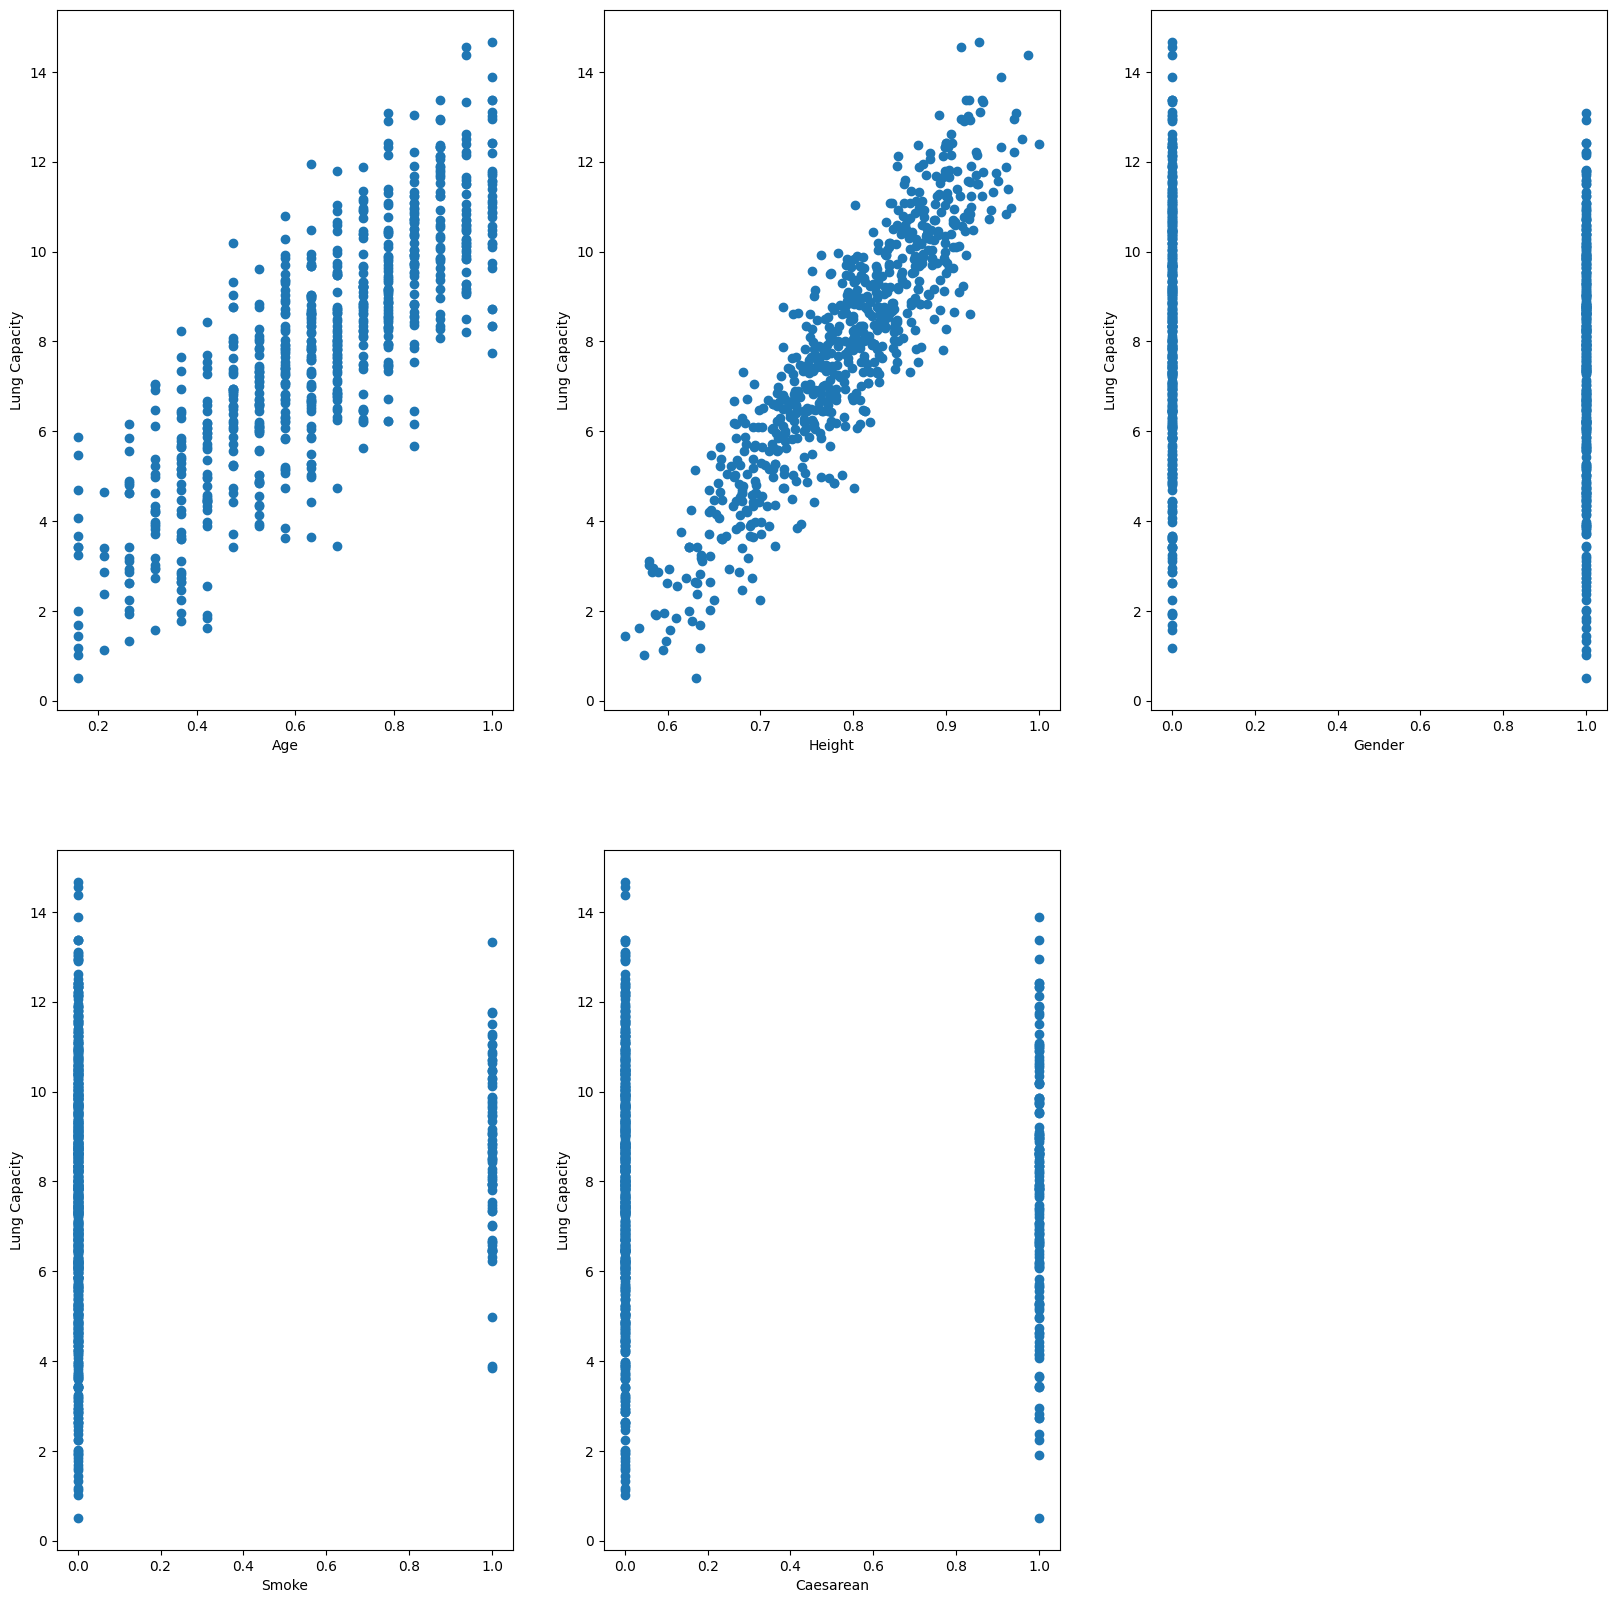

In [ ]:
plt.figure(figsize = (20,20))
plt.subplot(2,3,1)
plt.scatter(data['Age( years)'],data['LungCap(cc)']) # Lung capacity increases as age increases.
plt.ylabel("Lung Capacity")
plt.xlabel("Age")
plt.subplot(2,3,2)
plt.scatter(data['Height(inches)'],data['LungCap(cc)']) #We can see it is almost linearly related
plt.ylabel("Lung Capacity")
plt.xlabel("Height")
plt.subplot(2,3,3)
plt.scatter(data['Gender'],data['LungCap(cc)']) # We Can see males have more lung capacity than females
plt.ylabel("Lung Capacity")
plt.xlabel("Gender")
plt.subplot(2,3,4)
plt.scatter(data['Smoke'],data['LungCap(cc)']) # A non-smoker has more lung capacity
plt.ylabel("Lung Capacity")
plt.xlabel("Smoke")
plt.subplot(2,3,5)
plt.scatter(data['Caesarean'],data['LungCap(cc)']) # Almost the same lung capacity
plt.ylabel("Lung Capacity")
plt.xlabel("Caesarean")

In [ ]:
data.describe()

,LungCap(cc),Age( years),Height(inches),Smoke,Gender,Caesarean
count,711.000000,711.000000,711.000000,711.000000,711.000000,711.000000
mean,7.850819,0.648457,0.792226,0.106892,0.499297,0.219409
std,2.652989,0.212122,0.087703,0.309193,0.500351,0.414138
min,0.507000,0.157895,0.553790,0.000000,0.000000,0.000000
25%,6.150000,0.473684,0.732274,0.000000,0.000000,0.000000
50%,8.000000,0.684211,0.799511,0.000000,0.000000,0.000000
75%,9.750000,0.789474,0.860024,0.000000,1.000000,0.000000
max,14.675000,1.000000,1.000000,1.000000,1.000000,1.000000


Done with cleaning the data, now training the model.

In [ ]:
X = np.array(data[['Age( years)','Height(inches)','Smoke','Gender','Caesarean']])
y = np.array(data['LungCap(cc)'])

In [ ]:
X_train,X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [ ]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((533, 5), (533,), (178, 5), (178,))

In [ ]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    Input(5),
    Dense(50,activation='relu'),
    Dense(10,activation='relu'),
    Dense(1)
])

model.compile(loss=tf.keras.losses.mse,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])



In [ ]:
model.build()
model.load_weights('/content/Task_2_weights.h5')

In [ ]:
# Define the early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Uncomment if not using saved weights
# history = model.fit(X, y, epochs=1000,validation_data=(X_test,y_test),callbacks=[early_stopping])

Epoch 1/1000
23/23 [==============================] - 1s 9ms/step - loss: 58.7824 - mae: 7.2005 - val_loss: 52.5469 - val_mae: 6.7925
Epoch 2/1000
23/23 [==============================] - 0s 3ms/step - loss: 46.5744 - mae: 6.2927 - val_loss: 37.9961 - val_mae: 5.6363
Epoch 3/1000
23/23 [==============================] - 0s 3ms/step - loss: 31.4555 - mae: 5.0121 - val_loss: 22.6336 - val_mae: 4.1231
Epoch 4/1000
23/23 [==============================] - 0s 3ms/step - loss: 17.5940 - mae: 3.5363 - val_loss: 10.6512 - val_mae: 2.6376
Epoch 5/1000
23/23 [==============================] - 0s 3ms/step - loss: 8.9783 - mae: 2.4268 - val_loss: 6.1205 - val_mae: 2.0076
Epoch 6/1000
23/23 [==============================] - 0s 3ms/step - loss: 6.5629 - mae: 2.0551 - val_loss: 5.0918 - val_mae: 1.8440
Epoch 7/1000
23/23 [==============================] - 0s 3ms/step - loss: 5.5104 - mae: 1.8722 - val_loss: 4.3301 - val_mae: 1.6900
Epoch 8/1000
23/23 [==============================] - 0s 3ms/step - 

In [ ]:
model.save_weights('/content/Task_2_weights.h5')

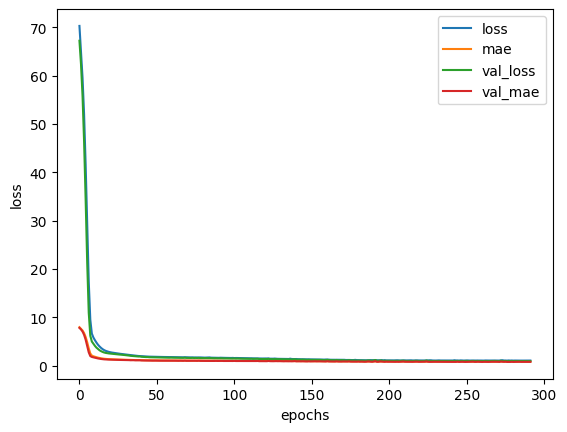

In [ ]:
# Plot history (also known as a loss curve)
pd.DataFrame(history.history).plot()

plt.ylabel("loss")
plt.xlabel("epochs");

[]

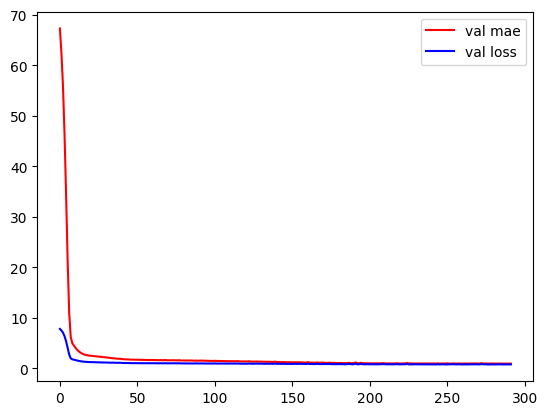

In [ ]:
plt.plot(range(len(history.history['val_loss'])),history.history['val_loss'],color='red')
plt.plot(range(len(history.history['val_loss'])),history.history['val_mae'],color= 'blue')
plt.legend({'val loss','val mae'})
plt.plot()

In [ ]:
y_pred = model.predict(X_test)

6/6 [==============================] - 0s 2ms/step


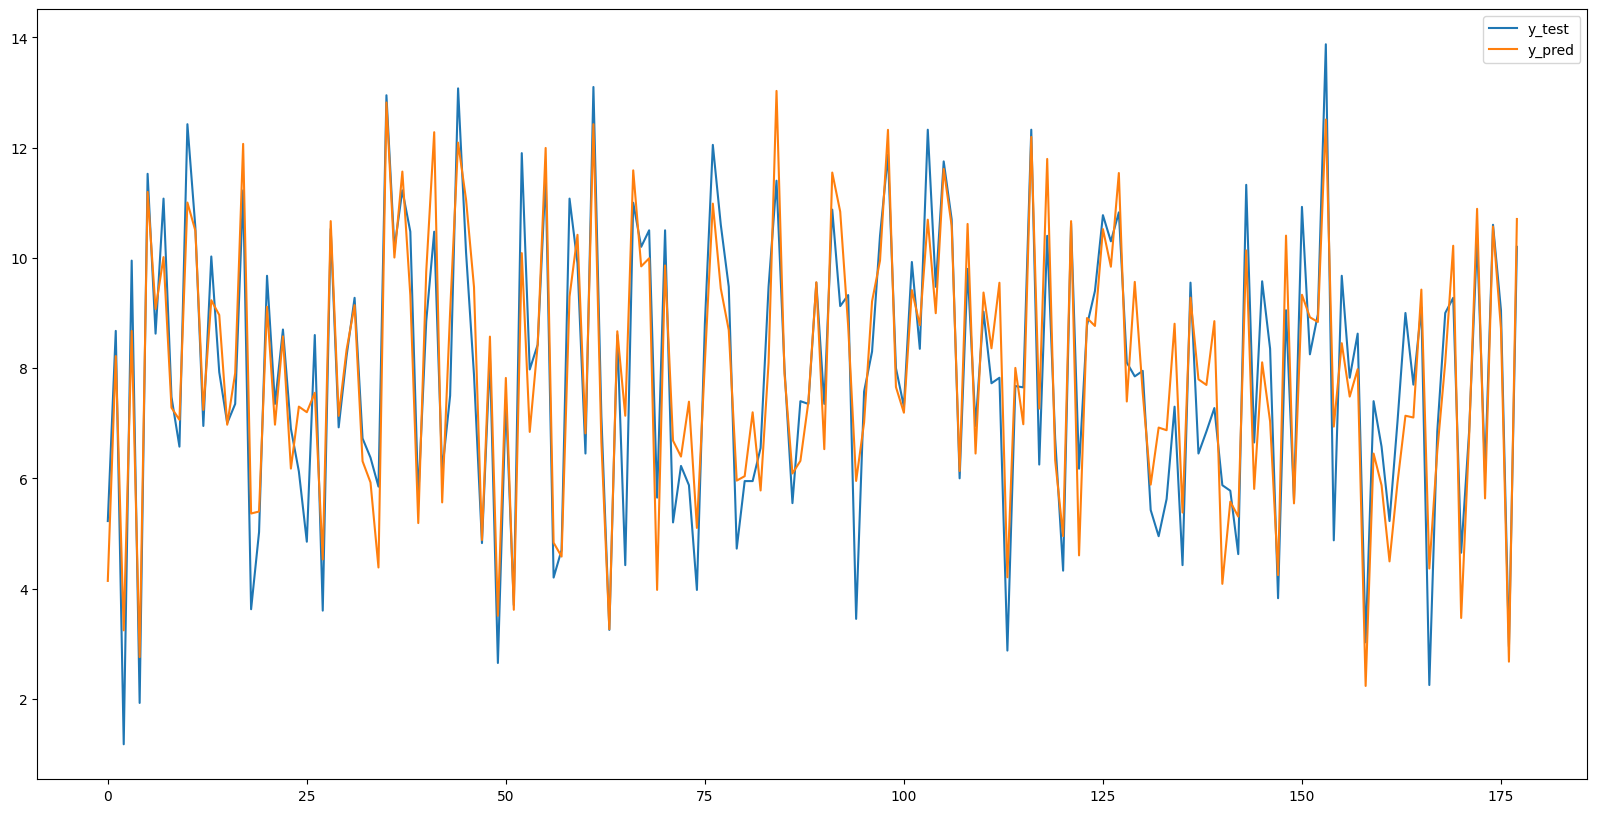

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(range(len(y_test)),y_test)
plt.plot(range(len(y_test)),y_pred)
plt.legend({'y_pred','y_test'})

Conclussion:
Looking at the graph , I can say that the model is able to predict well except in the case where the lung capacity is extremum